In [1]:
#Import the data 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
#Read the csv files
questions_python = pd.read_csv("Resources/Questions.csv", encoding = "iso-8859-1")
answers_python = pd.read_csv("Resources/Answers.csv", encoding = 'iso-8859-1')
tags_python = pd.read_csv("Resources/Tags.csv", encoding = 'iso-8859-1')

In [3]:
#Clean up the Data Frames
#Since we can't fully read the Title or the Body of the text from the DF,
#atually, we don't need the Title and Body of the text 
#I just remove them to make the data frames cleaner 
#And we will be working with the clean Data Frames from now on

clean_questions_python = questions_python[['Id','OwnerUserId', 'CreationDate',
                                           'Score','Title']]
clean_answers_python = answers_python[['Id','OwnerUserId','ParentId','CreationDate',
                                       'Score']]
clean_questions_python.head()

,Id,OwnerUserId,CreationDate,Score,Title
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...


In [4]:
#Sort Questions by ID
sort_questions = clean_questions_python.sort_values(ascending=True, by = 'Id')
#Sort Answers by ID
sort_answers = clean_answers_python.sort_values(ascending=True, by = 'Id')
#Sort Tags by ID 
sort_tags = tags_python.sort_values(ascending=True, by = 'Id')

In [6]:
#Convert date into numerical value for both Questions and Answers DF 
clean_questions_python['CreationDate'] = pd.to_datetime(questions_python['CreationDate'])
clean_answers_python['CreationDate'] = pd.to_datetime(answers_python['CreationDate'])


C:\Users\dinhh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dinhh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
#Rename the columns' names to make it looks better
sort_python_questions = sort_questions.rename(columns={'CreationDate': "Questions' Creation Date",
                                                      'OwnerUserId': "Owner's User Id"})
sort_python_answers = sort_answers.rename(columns={'CreationDate': "Answers' Creation Date",
                                                      'OwnerUserId': "Owner's User Id"})
sort_python_questions.head()

,Id,Owner's User Id,Questions' Creation Date,Score,Title
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...


In [75]:
sort_python_answers.head()

,Id,Owner's User Id,ParentId,Answers' Creation Date,Score
0,497,50.0,469,2008-08-02T16:56:53Z,4
1,518,153.0,469,2008-08-02T17:42:28Z,2
2,536,161.0,502,2008-08-02T18:49:07Z,9
3,538,156.0,535,2008-08-02T18:56:56Z,23
4,541,157.0,535,2008-08-02T19:06:40Z,20


In [76]:
#Merge answers and questions and tags into a single DF

merge_questions_answers = sort_python_answers.merge(sort_python_questions, left_on = 'ParentId', right_on = 'Id', suffixes = ['(Answers)' , '(Questions)'])
merge_all = sort_tags.join(merge_questions_answers)
merge_all.head()

#questions_python.dtypes

,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title
0,469,python,497.0,50.0,469.0,2008-08-02T16:56:53Z,4.0,469.0,147.0,2008-08-02T15:11:16Z,21.0,How can I find the full path to a font from it...
1,469,osx,518.0,153.0,469.0,2008-08-02T17:42:28Z,2.0,469.0,147.0,2008-08-02T15:11:16Z,21.0,How can I find the full path to a font from it...
2,469,fonts,3040.0,457.0,469.0,2008-08-06T03:01:23Z,12.0,469.0,147.0,2008-08-02T15:11:16Z,21.0,How can I find the full path to a font from it...
3,469,photoshop,195170.0,745.0,469.0,2008-10-12T07:02:40Z,1.0,469.0,147.0,2008-08-02T15:11:16Z,21.0,How can I find the full path to a font from it...
4,502,python,536.0,161.0,502.0,2008-08-02T18:49:07Z,9.0,502.0,147.0,2008-08-02T17:01:58Z,27.0,Get a preview JPEG of a PDF on Windows?


In [77]:
#Convert Questions' and Answers' Dates to numeric values to calculate 
merge_all["Questions' Creation Date"] = pd.to_datetime(merge_all["Questions' Creation Date"])
merge_all["Answers' Creation Date"] = pd.to_datetime(merge_all["Answers' Creation Date"])
#merge.dtypes

#Create a new column called 'Time it takes'
merge_all['Time it takes'] = merge_all["Answers' Creation Date"] - merge_all["Questions' Creation Date"]
sort_merge = merge_all.sort_values(ascending=True, by = 'Time it takes')
sort_merge.head(3)


,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title,Time it takes
266569,9334762,xml,10955711.0,279627.0,33054229.0,2012-06-08 20:33:54,39.0,33054229.0,1090079.0,2015-10-10 12:55:24,43.0,Accessing attributes on literals work on all t...,-1219 days +07:38:30
266570,9334762,lxml,10955713.0,14343.0,33054229.0,2012-06-08 20:34:00,84.0,33054229.0,1090079.0,2015-10-10 12:55:24,43.0,Accessing attributes on literals work on all t...,-1219 days +07:38:36
266571,9334779,python,10955754.0,1358283.0,33054229.0,2012-06-08 20:38:16,7.0,33054229.0,1090079.0,2015-10-10 12:55:24,43.0,Accessing attributes on literals work on all t...,-1219 days +07:42:52


In [11]:
#Convert column 'Time it takes' to numerical values (in term of hours)
sort_merge["Time it takes"] =  sort_merge['Time it takes'] / np.timedelta64(1, 'h')

#Quick note: after the conversion, the column 'Time it takes' will now be of type
#float64 instead of timedelta64 so if you try to run this cell again, it will 
#give you an error, this is normal. Run cell 18 again and the problem is solved.

#Extract the cells with negative 'Time it takes'
sort_merge = sort_merge.loc[sort_merge['Time it takes'] > 0]
sort_merge.head()

#Since it doesn't make sense for a question and answer to be created at 00:00:00,
#I make the decision to remove these entries.
#In order to make sure that I didn't make drastic change to the data table,
#I check that these instances are the outliers. Sure enough, we have 1382 out of 
#987097 total instances where question and answer creation dates are at 00:00:00
#which gives us 0.14% of our total entries. In the following code, you can test
#it yourselve. 
#non_negative_time = sort_merge.loc[sort_merge['Time it takes'] >= 0]
#zero_time = sort_merge.loc[sort_merge['Time it takes'] == 0]
#zero_time['Time it takes'].count(),non_negative_time['Time it takes'].count()


,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title,Time it takes
274051,9559646,list,11276096.0,382374.0,11276095.0,2012-06-30 17:24:27,0.0,11276095.0,382374.0,2012-06-30 17:24:26,0.0,Django MemoryError while Using Python Imaging ...,0.000278
269184,9413002,python,11066852.0,1175266.0,11066850.0,2012-06-16 20:38:01,5.0,11066850.0,1175266.0,2012-06-16 20:38:00,2.0,"Error message ""no theme named 'sphinx-theme-ok...",0.000278
272554,9517829,django,11210301.0,1258041.0,11210300.0,2012-06-26 15:04:56,17.0,11210300.0,1258041.0,2012-06-26 15:04:55,10.0,Why does zip() drop the values of my generator?,0.000278
267307,9354385,sl4a,10985578.0,1290420.0,10985576.0,2012-06-11 18:29:12,8.0,10985576.0,1290420.0,2012-06-11 18:29:11,3.0,How to represent a jar file as a network graph?,0.000278
266527,9333245,python,10953696.0,533738.0,10953695.0,2012-06-08 17:52:24,47.0,10953695.0,533738.0,2012-06-08 17:52:23,29.0,Update new Django and Python 2.7.* with virtua...,0.000278


In [69]:
#Perform a groupby to rank the average time based on tag.
average_time_df = sort_merge[['Tag',"Time it takes"]]
average_time_per_tag = round(average_time_df.groupby(average_time_df['Tag']).mean(),6) 
average_time_per_tag = average_time_per_tag.reset_index()
average_time_per_tag.head(5)

,Tag,Time it takes
0,.app,50.320000
1,.aspxauth,1.608611
2,.bash-profile,117.466759
3,.class-file,23.568056
4,.doc,0.063611


In [70]:
#Perform a value count to rank tags by popularity
merge_all['Tag'].value_counts().head(10)

python        607283
django         62818
python-2.7     34616
pandas         26854
python-3.x     26814
numpy          25848
list           18951
matplotlib     16521
regex          14047
dictionary     13413
Name: Tag, dtype: int64

<Figure size 1440x216 with 0 Axes>

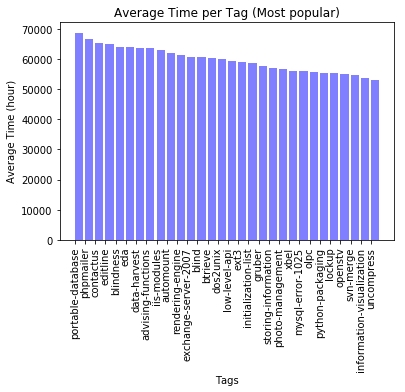

<Figure size 1440x216 with 0 Axes>

In [71]:
#Plot a bar chart for the top 30 popular tags in relation to the time it takes 
#for an answer to be posted
average_time_per_tag = average_time_per_tag.sort_values(ascending=False, by = 'Time it takes')
average_time = average_time_per_tag['Time it takes'][0:30]
tags = average_time_per_tag['Tag'][0:30]
plt.bar(tags,average_time, color='b', alpha=0.5, align="edge")
tick_locations = [value for value in tags]
plt.xticks(tick_locations, tags, rotation="vertical")

#Set Titles
plt.title("Average Time per Tag (Most popular)")
plt.ylabel("Average Time (hour)")
plt.xlabel("Tags")
plt.figure(figsize=(20,3))


In [72]:
#list of the 30 Highest waiting time with respect to tags
tags

8548             portable-database
8364                     phpmailer
1951                     contactus
3229                      editline
1011                     blindness
3219                           eda
2342                  data-harvest
193             advising-functions
5194                   iis-modules
722                      automount
9687              rendering-engine
3506          exchange-server-2007
1010                         blind
1157                       btrieve
3016                      dos2unix
6393                 low-level-api
3568                          ext3
5343           initialization-list
4703                        gruber
10987          storing-information
8343              photo-management
12805                         xbel
7224              mysql-error-1025
7726                          olpc
9116              python-packaging
6327                        lockup
7859                       openstv
11183                    svn-merge
5332     information

<Figure size 1080x216 with 0 Axes>

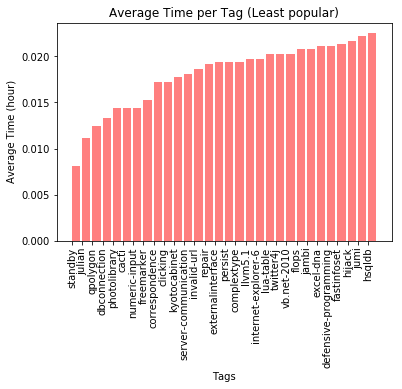

<Figure size 1080x216 with 0 Axes>

In [58]:
#Plot a bar chart for the top 30 least popular tags in relation to the time 
#it takes
average_time_per_tag = average_time_per_tag.sort_values(ascending=True, by = 'Time it takes')
average_time = average_time_per_tag['Time it takes'][0:30]
tags = average_time_per_tag['Tag'][0:30]
plt.bar(tags,average_time, color='r', alpha=0.5, align="edge")
tick_locations = [value for value in tags]
plt.xticks(tick_locations, tags, rotation="vertical")

average_time_per_tag.head(20)
#Set Titles
plt.title("Average Time per Tag (Least popular)")
plt.ylabel("Average Time (hour)")
plt.xlabel("Tags")
plt.figure(figsize=(15,3))


In [64]:
#list of the 30 lowest waiting time with respect to tags 
tags

10886                  standby
5816                    julian
9249                  qpolygon
2464              dbconnection
8348              photolibrary
1261                     cacti
7590             numeric-input
4090                freemarker
2053            correspondence
1578                  clicking
5956              kyotocabinet
10281     server-communication
5494               invalid-url
9692                    repair
3584         externalinterface
8298                   persist
1841               complextype
6284                   llvm5.1
5463       internet-explorer-6
6413                 lua-table
11837                twitter4j
12166              vb.net-2010
3943                     flops
5635                     jambi
3496                 excel-dna
2535     defensive-programming
3674               fastinfoset
4912                    hijack
5819                      jumi
4968                    hsqldb
Name: Tag, dtype: object

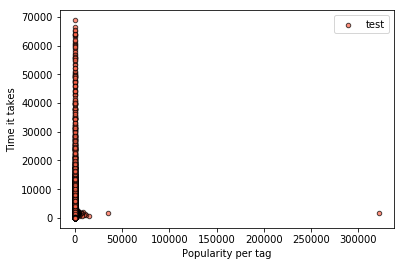

In [60]:
#Create a scatter plot of the population with independent variable: tag's popularity
#and dependent variable: average time it takes to answer
#In order to do this, I want to create a DF which contains both of these variables

popularity_per_tag_df = pd.DataFrame({
    'Popularity per tag': average_time_df['Tag'].value_counts()})
average_time_per_tag = round(average_time_df.groupby(average_time_df['Tag']).mean(),6)
scatter_df = popularity_per_tag_df.join(average_time_per_tag)
scatter_df = scatter_df[['Time it takes','Popularity per tag']]


#Scatter plot
scatter_df.plot.scatter(x = 'Popularity per tag',y= 'Time it takes',
                           marker="o", color="tomato",label = "test",
                           alpha = 0.7, stacked = False, edgecolors = 'black')

#Original Hypothesis: The least commonly known languages take less time to answer
#Based on this graph, our original hypothesis failed since the least popular 
#tags are the ones with the highest waiting times.
#Note: With a highly skewed distribution, it is very difficult to work with 
#the old hypothesis, I'm working on our new hypothesis right now.I'll will 
#I'll update you guys if I made further progress. 

In [63]:
#Quickly check the above plot with our data frame
scatter_df = scatter_df.sort_values(ascending=False, by = 'Popularity per tag')
scatter_df.head(10)

,Time it takes,Popularity per tag
python,1714.546490,321923
django,1831.969893,35173
python-2.7,649.454735,14644
numpy,1172.998791,11954
list,1508.986889,10283
python-3.x,1051.195970,9734
google-app-engine,2183.306462,8166
regex,1760.230000,8062
matplotlib,1173.698182,7455
pandas,532.987671,7221


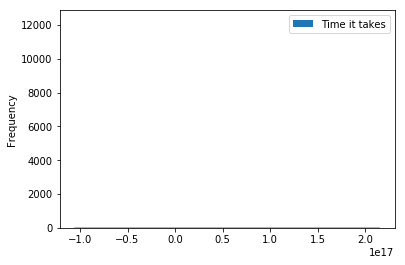

In [55]:
#average_time_histogram = pd.DataFrame({'average_time_df': np.random.normal(size=100)})
#average_time_df.describe()
#pd.cut(np.array([-1.052941e+17, 3.810000e+11, 1.204000e+12, 7.945000e+12, 2.153771e+17]), 3)
#range = np.arange(-1.052941e+17, 2.153771e+17, 1e+15)
#plt.plot(range, norm.pdf(range,-1.052941e+17, 2.153771e+17))
#average_time_df_scatter = average_time_df.plot.kde()